In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.linalg import sqrtm
from scipy.signal import find_peaks
import os
os.environ["CUDA_VISIBLE_DEVICES"]='0'

# def find_peak_2d(data):
#     result = data.copy()
#     result[:,:] = 0
#     for i in range(data.shape[1]):
#         signal = data[:,i]
#         peaks, _ = find_peaks(signal, height=0)
#         result[:,i][peaks] = 1.
#     return result

def find_peak_2d(data):
    result = data.copy()
    result[:,:] = 0
    for i in range(data.shape[1]):
        signal = data[:,i]
        peaks1, _ = find_peaks(signal, height=0)
        peaks2, _ = find_peaks(-signal, height=0)
        result[:,i][peaks1] = data[:,i][peaks1]
        result[:,i][peaks2] = data[:,i][peaks2]
    return result

def gen_patch4(arr):
    output = []  
    for i in range(len(arr)):
        output.append(arr[i][:,:128])
        output.append(arr[i][:,128:256])
        output.append(arr[i][:,256:384])
        output.append(arr[i][:,384:])
    return np.array(output)

def minmax_scaler(data):
    scaled = []
    for d in data:
        scaled.append((d - np.min(d)) / (np.max(d) - np.min(d)))
    return np.array(scaled)

def FID_from_vec(act1, act2):
    mu1, sigma1 = act1.mean(axis=0), np.cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), np.cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if np.iscomplexobj(covmean):
            covmean = covmean.real
    # calculate score
    fid = ssdiff + np.trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

def FID_from_imgs(imgs1, imgs2):
    d1 = np.concatenate([imgs1,imgs1,imgs1],axis=3)
    d2 = np.concatenate([imgs2,imgs2,imgs2],axis=3)
    v1 = inception_model.predict(d1)
    v2 = inception_model.predict(d2)
    return FID_from_vec(v1,v2)

def show_grid(data,r=4,c=4,jump=1,title='',save='',cmap='gray'):
    plt.figure(figsize=(c*2+1,r*2+1))
    i = 1
    for j in range(0,len(data),jump):
        dat = data[j]
        plt.subplot(r, c, i) 
        plt.imshow(dat, cmap=cmap)
        plt.axis('off')
        i+=1
        if i > r*c: break
    if title:
        plt.suptitle(title)
    if save:
        plt.savefig(save, bbox_inches='tight', pad_inches=0)
        plt.close()
    plt.show()
    
def show_grid_v2(data,r=4,c=4,jump=1,title='',save='',cmap='gray'):
    plt.figure(figsize=(c*2+1,r*2+1))
    i = 1
    for j in range(0,len(data),jump):
        dat = data[j]
        plt.subplot(r, c, i) 
        plt.imshow(dat, cmap=cmap)
        plt.axis('off')
        i+=1
        if i > r*c: break
    if title:
        plt.suptitle(title, fontsize=15)
    if save:
        plt.savefig(save) #, bbox_inches='tight', pad_inches=0)
        plt.close()
    plt.show()

In [2]:
def standard_scaler(data):
    scaled = []
    for d in data:
        scaled.append((d - np.mean(d))/np.std(d))
    return np.array(scaled)

In [3]:
from tqdm import tqdm

In [4]:
inception_model = tf.keras.applications.InceptionV3(include_top=False, 
                                                    input_shape=(128,128,3),
                                                    weights="imagenet", 
                                                    pooling='avg')

In [5]:
step50s = list(range(50,5050,50))
step50s

[50,
 100,
 150,
 200,
 250,
 300,
 350,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 850,
 900,
 950,
 1000,
 1050,
 1100,
 1150,
 1200,
 1250,
 1300,
 1350,
 1400,
 1450,
 1500,
 1550,
 1600,
 1650,
 1700,
 1750,
 1800,
 1850,
 1900,
 1950,
 2000,
 2050,
 2100,
 2150,
 2200,
 2250,
 2300,
 2350,
 2400,
 2450,
 2500,
 2550,
 2600,
 2650,
 2700,
 2750,
 2800,
 2850,
 2900,
 2950,
 3000,
 3050,
 3100,
 3150,
 3200,
 3250,
 3300,
 3350,
 3400,
 3450,
 3500,
 3550,
 3600,
 3650,
 3700,
 3750,
 3800,
 3850,
 3900,
 3950,
 4000,
 4050,
 4100,
 4150,
 4200,
 4250,
 4300,
 4350,
 4400,
 4450,
 4500,
 4550,
 4600,
 4650,
 4700,
 4750,
 4800,
 4850,
 4900,
 4950,
 5000]

In [6]:
path_in= "/h1/bhoon/20221229_pix2pix_lambda/F3_Input.npy"
F3path = "/s1/bhoon/dataset/cyclegan_proj/real_f3_data/real_f3_data_raw.npy"

In [7]:
F3 = np.load(F3path).astype(np.float32)
F3 = np.swapaxes(F3,1,2)
F3 = standard_scaler(F3)
F3_patch = gen_patch4(F3)
F3.shape, F3_patch.shape
scaled_F3_patch = minmax_scaler(F3_patch)*2 -1

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:15<24:49, 15.05s/it]

  2%|▏         | 2/100 [00:24<21:43, 13.30s/it]

  3%|▎         | 3/100 [00:33<19:38, 12.15s/it]

  4%|▍         | 4/100 [00:42<17:42, 11.07s/it]

  5%|▌         | 5/100 [00:50<16:03, 10.14s/it]

  6%|▌         | 6/100 [00:58<15:06,  9.65s/it]

  7%|▋         | 7/100 [01:07<14:24,  9.29s/it]

  8%|▊         | 8/100 [01:15<13:47,  8.99s/it]

  9%|▉         | 9/100 [01:23<13:08,  8.66s/it]

 10%|█         | 10/100 [01:31<12:51,  8.57s/it]

 11%|█         | 11/100 [01:39<12:30,  8.44s/it]

 12%|█▏        | 12/100 [01:49<12:50,  8.76s/it]

 13%|█▎        | 13/100 [01:58<12:55,  8.92s/it]

 14%|█▍        | 14/100 [02:08<13:00,  9.08s/it]

 15%|█▌        | 15/100 [02:17<13:02,  9.21s/it]

 16%|█▌        | 16/100 [02:26<12:34,  8.98s/it]

 17%|█▋        | 17/100 [02:35<12:34,  9.10s/it]

 18%|█▊        | 18/100 [02:44<12:27,  9.11s/it]

 19%|█▉        | 19/100 [02:54<12:37,  9.35s/it]

 20%|██        | 20/100 [03:03<12:07,  9.09s/it]

 21%|██        | 21/100 [03:12<11:59,  9.11s/it]

 22%|██▏       | 22/100 [03:20<11:29,  8.83s/it]

 23%|██▎       | 23/100 [03:28<11:13,  8.75s/it]

 24%|██▍       | 24/100 [03:37<11:12,  8.84s/it]

 25%|██▌       | 25/100 [03:46<11:01,  8.82s/it]

 26%|██▌       | 26/100 [03:56<11:12,  9.08s/it]

 27%|██▋       | 27/100 [04:06<11:17,  9.28s/it]

 28%|██▊       | 28/100 [04:15<11:04,  9.23s/it]

 29%|██▉       | 29/100 [04:24<10:44,  9.08s/it]

 30%|███       | 30/100 [04:32<10:25,  8.94s/it]

 31%|███       | 31/100 [04:42<10:28,  9.11s/it]

 32%|███▏      | 32/100 [04:51<10:20,  9.13s/it]

 33%|███▎      | 33/100 [05:00<10:08,  9.09s/it]

 34%|███▍      | 34/100 [05:08<09:51,  8.96s/it]

 35%|███▌      | 35/100 [05:17<09:40,  8.92s/it]

 36%|███▌      | 36/100 [05:26<09:30,  8.91s/it]

 37%|███▋      | 37/100 [05:35<09:11,  8.76s/it]

 38%|███▊      | 38/100 [05:43<09:04,  8.78s/it]

 39%|███▉      | 39/100 [05:52<08:50,  8.70s/it]

 40%|████      | 40/100 [06:01<08:46,  8.77s/it]

 41%|████      | 41/100 [06:10<08:46,  8.92s/it]

 42%|████▏     | 42/100 [06:19<08:34,  8.86s/it]

 43%|████▎     | 43/100 [06:28<08:33,  9.01s/it]

 44%|████▍     | 44/100 [06:36<08:09,  8.73s/it]

 45%|████▌     | 45/100 [06:45<07:56,  8.66s/it]

 46%|████▌     | 46/100 [06:53<07:39,  8.50s/it]

 47%|████▋     | 47/100 [07:02<07:36,  8.62s/it]

 48%|████▊     | 48/100 [07:10<07:23,  8.52s/it]

 49%|████▉     | 49/100 [07:19<07:15,  8.55s/it]

 50%|█████     | 50/100 [07:27<07:02,  8.45s/it]

 51%|█████     | 51/100 [07:35<06:47,  8.32s/it]

 52%|█████▏    | 52/100 [07:43<06:38,  8.31s/it]

 53%|█████▎    | 53/100 [07:52<06:35,  8.42s/it]

 54%|█████▍    | 54/100 [08:00<06:26,  8.39s/it]

 55%|█████▌    | 55/100 [08:08<06:15,  8.35s/it]

 56%|█████▌    | 56/100 [08:17<06:09,  8.40s/it]

 57%|█████▋    | 57/100 [08:26<06:07,  8.55s/it]

 58%|█████▊    | 58/100 [08:34<05:56,  8.48s/it]

 59%|█████▉    | 59/100 [08:42<05:43,  8.39s/it]

 60%|██████    | 60/100 [08:51<05:34,  8.37s/it]

 61%|██████    | 61/100 [08:59<05:23,  8.31s/it]

 62%|██████▏   | 62/100 [09:07<05:14,  8.28s/it]

 63%|██████▎   | 63/100 [09:15<05:05,  8.26s/it]

 64%|██████▍   | 64/100 [09:24<04:57,  8.26s/it]

 65%|██████▌   | 65/100 [09:32<04:48,  8.23s/it]

 66%|██████▌   | 66/100 [09:41<04:46,  8.42s/it]

 67%|██████▋   | 67/100 [09:49<04:37,  8.39s/it]

 68%|██████▊   | 68/100 [09:57<04:25,  8.29s/it]

 69%|██████▉   | 69/100 [10:05<04:16,  8.28s/it]

 70%|███████   | 70/100 [10:13<04:06,  8.22s/it]

 71%|███████   | 71/100 [10:21<03:57,  8.20s/it]

 72%|███████▏  | 72/100 [10:30<03:52,  8.29s/it]

 73%|███████▎  | 73/100 [10:39<03:50,  8.55s/it]

 74%|███████▍  | 74/100 [10:48<03:45,  8.68s/it]

 75%|███████▌  | 75/100 [10:58<03:42,  8.90s/it]

 76%|███████▌  | 76/100 [11:07<03:34,  8.94s/it]

 77%|███████▋  | 77/100 [11:16<03:30,  9.17s/it]

 78%|███████▊  | 78/100 [11:26<03:25,  9.36s/it]

 79%|███████▉  | 79/100 [11:35<03:12,  9.15s/it]

 80%|████████  | 80/100 [11:43<03:00,  9.01s/it]

 81%|████████  | 81/100 [11:52<02:46,  8.78s/it]

 82%|████████▏ | 82/100 [12:01<02:40,  8.94s/it]

 83%|████████▎ | 83/100 [12:10<02:29,  8.82s/it]

 84%|████████▍ | 84/100 [12:18<02:19,  8.71s/it]

 85%|████████▌ | 85/100 [12:26<02:08,  8.57s/it]

 86%|████████▌ | 86/100 [12:34<01:58,  8.48s/it]

 87%|████████▋ | 87/100 [12:43<01:49,  8.45s/it]

 88%|████████▊ | 88/100 [12:51<01:41,  8.42s/it]

 89%|████████▉ | 89/100 [12:59<01:31,  8.34s/it]

 90%|█████████ | 90/100 [13:08<01:24,  8.42s/it]

 91%|█████████ | 91/100 [13:16<01:15,  8.34s/it]

 92%|█████████▏| 92/100 [13:25<01:06,  8.37s/it]

 93%|█████████▎| 93/100 [13:33<00:57,  8.25s/it]

 94%|█████████▍| 94/100 [13:42<00:51,  8.58s/it]

 95%|█████████▌| 95/100 [13:51<00:43,  8.63s/it]

 96%|█████████▌| 96/100 [13:59<00:34,  8.59s/it]

 97%|█████████▋| 97/100 [14:07<00:25,  8.47s/it]

 98%|█████████▊| 98/100 [14:16<00:17,  8.58s/it]

 99%|█████████▉| 99/100 [14:24<00:08,  8.42s/it]

100%|██████████| 100/100 [14:32<00:00,  8.73s/it]


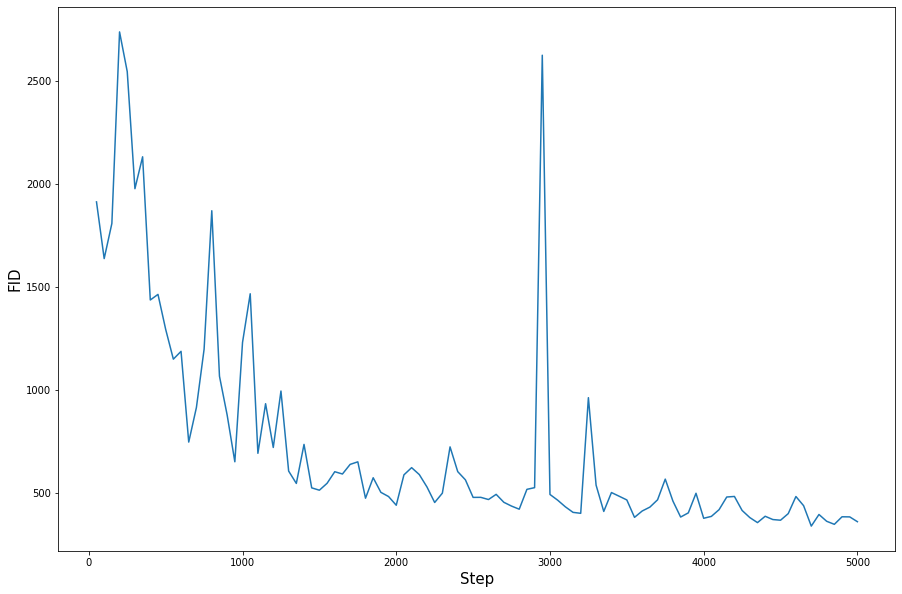

93


In [8]:
peak_data_patch = np.load(path_in)
SPLIT = 5
data_idx  = np.arange(len(scaled_F3_patch))
valid_idx  = data_idx[::SPLIT]
train_idx = np.delete(data_idx, valid_idx)
trainGT = np.expand_dims(scaled_F3_patch,3)[train_idx]
validGT = np.expand_dims(scaled_F3_patch,3)[valid_idx]
trainIN = np.expand_dims(peak_data_patch,3)[train_idx]
validIN = np.expand_dims(peak_data_patch,3)[valid_idx]

fids = []
for s in tqdm(step50s):
    model_path = '/h1/bhoon/20221229_pix2pix_lambda/model/lambda_0/G_{}.h5'.format(str(s).zfill(5))
    model = tf.keras.models.load_model(model_path)
    validOUT = model.predict(validIN)
    fid = FID_from_imgs(validGT,validOUT)
    fids.append(fid)
    show_grid_v2(validOUT, save='/h1/bhoon/20221229_pix2pix_lambda/image/lambda_0/{}.jpg'.format(str(s).zfill(5)), title=fid)
    del model
    
plt.figure(figsize=(15,10))
plt.plot(step50s,fids)
plt.xlabel("Step",fontsize=15)
plt.ylabel("FID",fontsize=15)
plt.show()
print(np.argmin(np.array(fids)))

f = open("/h1/bhoon/20221229_pix2pix_lambda/lambda_0_fid.txt", 'w')
for i in range(len(fids)):
    f.write("{}\n".format(str(fids[i])))
f.close()

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:08<13:24,  8.13s/it]

  2%|▏         | 2/100 [00:16<13:25,  8.22s/it]

  3%|▎         | 3/100 [00:25<13:24,  8.30s/it]

  4%|▍         | 4/100 [00:33<13:09,  8.23s/it]

  5%|▌         | 5/100 [00:42<13:22,  8.44s/it]

  6%|▌         | 6/100 [00:50<13:08,  8.39s/it]

  7%|▋         | 7/100 [00:58<13:03,  8.42s/it]

  8%|▊         | 8/100 [01:08<13:19,  8.69s/it]

  9%|▉         | 9/100 [01:16<13:15,  8.74s/it]

 10%|█         | 10/100 [01:26<13:24,  8.94s/it]

 11%|█         | 11/100 [01:35<13:25,  9.05s/it]

 12%|█▏        | 12/100 [01:45<13:25,  9.16s/it]

 13%|█▎        | 13/100 [01:54<13:30,  9.31s/it]

 14%|█▍        | 14/100 [02:04<13:37,  9.51s/it]

 15%|█▌        | 15/100 [02:13<13:14,  9.34s/it]

 16%|█▌        | 16/100 [02:23<13:13,  9.45s/it]

 17%|█▋        | 17/100 [02:32<13:00,  9.41s/it]

 18%|█▊        | 18/100 [02:41<12:32,  9.18s/it]

 19%|█▉        | 19/100 [02:49<12:05,  8.96s/it]

 20%|██        | 20/100 [02:58<11:53,  8.92s/it]

 21%|██        | 21/100 [03:07<11:43,  8.90s/it]

 22%|██▏       | 22/100 [03:17<11:55,  9.18s/it]

 23%|██▎       | 23/100 [03:26<11:38,  9.07s/it]

 24%|██▍       | 24/100 [03:34<11:21,  8.97s/it]

 25%|██▌       | 25/100 [03:44<11:17,  9.04s/it]

 26%|██▌       | 26/100 [03:52<10:58,  8.90s/it]

 27%|██▋       | 27/100 [04:01<10:39,  8.76s/it]

 28%|██▊       | 28/100 [04:09<10:20,  8.62s/it]

 29%|██▉       | 29/100 [04:17<10:11,  8.61s/it]

 30%|███       | 30/100 [04:26<09:52,  8.47s/it]

 31%|███       | 31/100 [04:34<09:50,  8.56s/it]

 32%|███▏      | 32/100 [04:43<09:36,  8.47s/it]

 33%|███▎      | 33/100 [04:51<09:29,  8.50s/it]

 34%|███▍      | 34/100 [05:01<09:39,  8.78s/it]

 35%|███▌      | 35/100 [05:09<09:24,  8.69s/it]

 36%|███▌      | 36/100 [05:19<09:33,  8.95s/it]

 37%|███▋      | 37/100 [05:28<09:29,  9.04s/it]

 38%|███▊      | 38/100 [05:37<09:20,  9.03s/it]

 39%|███▉      | 39/100 [05:46<09:09,  9.00s/it]

 40%|████      | 40/100 [05:54<08:51,  8.85s/it]

 41%|████      | 41/100 [06:04<08:54,  9.06s/it]

 42%|████▏     | 42/100 [06:14<08:54,  9.22s/it]

 43%|████▎     | 43/100 [06:22<08:36,  9.06s/it]

 44%|████▍     | 44/100 [06:32<08:34,  9.19s/it]

 45%|████▌     | 45/100 [06:40<08:14,  8.99s/it]

 46%|████▌     | 46/100 [06:48<07:53,  8.77s/it]

 47%|████▋     | 47/100 [06:57<07:45,  8.77s/it]

 48%|████▊     | 48/100 [07:06<07:38,  8.81s/it]

 49%|████▉     | 49/100 [07:15<07:28,  8.79s/it]

 50%|█████     | 50/100 [07:23<07:10,  8.61s/it]

 51%|█████     | 51/100 [07:32<07:00,  8.58s/it]

 52%|█████▏    | 52/100 [07:40<06:47,  8.49s/it]

 53%|█████▎    | 53/100 [07:49<06:41,  8.54s/it]

 54%|█████▍    | 54/100 [07:57<06:36,  8.63s/it]

 55%|█████▌    | 55/100 [08:06<06:31,  8.70s/it]

 56%|█████▌    | 56/100 [08:15<06:20,  8.64s/it]

 57%|█████▋    | 57/100 [08:24<06:13,  8.69s/it]

 58%|█████▊    | 58/100 [08:32<06:01,  8.62s/it]

 59%|█████▉    | 59/100 [08:41<06:01,  8.82s/it]

 60%|██████    | 60/100 [08:51<06:04,  9.11s/it]

 61%|██████    | 61/100 [09:00<05:57,  9.15s/it]

 62%|██████▏   | 62/100 [09:09<05:45,  9.08s/it]

 63%|██████▎   | 63/100 [09:17<05:26,  8.82s/it]

 64%|██████▍   | 64/100 [09:26<05:15,  8.77s/it]

 65%|██████▌   | 65/100 [09:34<05:00,  8.59s/it]

 66%|██████▌   | 66/100 [09:43<04:53,  8.63s/it]

 67%|██████▋   | 67/100 [09:51<04:42,  8.55s/it]

 68%|██████▊   | 68/100 [10:00<04:33,  8.54s/it]

 69%|██████▉   | 69/100 [10:08<04:22,  8.46s/it]

 70%|███████   | 70/100 [10:17<04:14,  8.48s/it]

 71%|███████   | 71/100 [10:25<04:06,  8.50s/it]

 72%|███████▏  | 72/100 [10:34<04:00,  8.60s/it]

 73%|███████▎  | 73/100 [10:43<03:52,  8.63s/it]

 74%|███████▍  | 74/100 [10:52<03:45,  8.68s/it]

 75%|███████▌  | 75/100 [11:01<03:42,  8.90s/it]

 76%|███████▌  | 76/100 [11:10<03:36,  9.04s/it]

 77%|███████▋  | 77/100 [11:19<03:27,  9.01s/it]

 78%|███████▊  | 78/100 [11:28<03:14,  8.83s/it]

 79%|███████▉  | 79/100 [11:37<03:11,  9.12s/it]

 80%|████████  | 80/100 [11:47<03:06,  9.34s/it]

 81%|████████  | 81/100 [11:56<02:55,  9.22s/it]

 82%|████████▏ | 82/100 [12:05<02:45,  9.21s/it]

 83%|████████▎ | 83/100 [12:14<02:35,  9.15s/it]

 84%|████████▍ | 84/100 [12:24<02:27,  9.24s/it]

 85%|████████▌ | 85/100 [12:32<02:14,  8.96s/it]

 86%|████████▌ | 86/100 [12:42<02:08,  9.17s/it]

 87%|████████▋ | 87/100 [12:50<01:56,  8.94s/it]

 88%|████████▊ | 88/100 [12:59<01:44,  8.73s/it]

 89%|████████▉ | 89/100 [13:07<01:34,  8.60s/it]

 90%|█████████ | 90/100 [13:16<01:26,  8.66s/it]

 91%|█████████ | 91/100 [13:24<01:16,  8.54s/it]

 92%|█████████▏| 92/100 [13:32<01:08,  8.54s/it]

 93%|█████████▎| 93/100 [13:41<00:59,  8.44s/it]

 94%|█████████▍| 94/100 [13:49<00:51,  8.55s/it]

 95%|█████████▌| 95/100 [13:58<00:42,  8.59s/it]

 96%|█████████▌| 96/100 [14:07<00:34,  8.67s/it]

 97%|█████████▋| 97/100 [14:15<00:25,  8.62s/it]

 98%|█████████▊| 98/100 [14:24<00:17,  8.59s/it]

 99%|█████████▉| 99/100 [14:32<00:08,  8.56s/it]

100%|██████████| 100/100 [14:41<00:00,  8.81s/it]


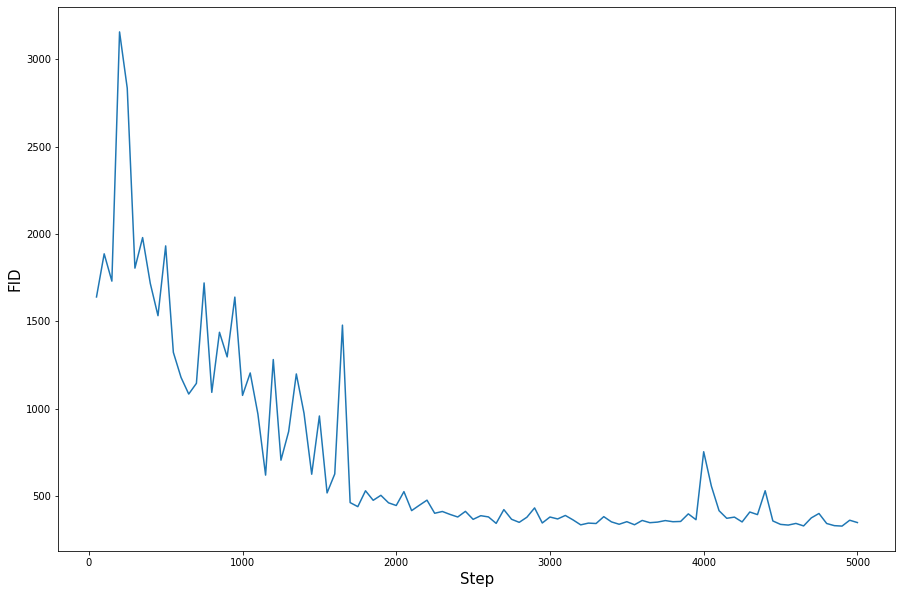

97


In [9]:
peak_data_patch = np.load(path_in)
SPLIT = 5
data_idx  = np.arange(len(scaled_F3_patch))
valid_idx  = data_idx[::SPLIT]
train_idx = np.delete(data_idx, valid_idx)
trainGT = np.expand_dims(scaled_F3_patch,3)[train_idx]
validGT = np.expand_dims(scaled_F3_patch,3)[valid_idx]
trainIN = np.expand_dims(peak_data_patch,3)[train_idx]
validIN = np.expand_dims(peak_data_patch,3)[valid_idx]

fids = []
for s in tqdm(step50s):
    model_path = '/h1/bhoon/20221229_pix2pix_lambda/model/lambda_0.1/G_{}.h5'.format(str(s).zfill(5))
    model = tf.keras.models.load_model(model_path)
    validOUT = model.predict(validIN)
    fid = FID_from_imgs(validGT,validOUT)
    fids.append(fid)
    show_grid_v2(validOUT, save='/h1/bhoon/20221229_pix2pix_lambda/image/lambda_0.1/{}.jpg'.format(str(s).zfill(5)), title=fid)
    del model
    
plt.figure(figsize=(15,10))
plt.plot(step50s,fids)
plt.xlabel("Step",fontsize=15)
plt.ylabel("FID",fontsize=15)
plt.show()
print(np.argmin(np.array(fids)))

f = open("/h1/bhoon/20221229_pix2pix_lambda/lambda_0.1_fid.txt", 'w')
for i in range(len(fids)):
    f.write("{}\n".format(str(fids[i])))
f.close()

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:09<16:19,  9.89s/it]

  2%|▏         | 2/100 [00:18<15:31,  9.50s/it]

  3%|▎         | 3/100 [00:27<14:58,  9.26s/it]

  4%|▍         | 4/100 [00:36<14:36,  9.13s/it]

  5%|▌         | 5/100 [00:44<14:19,  9.05s/it]

  6%|▌         | 6/100 [00:53<13:58,  8.92s/it]

  7%|▋         | 7/100 [01:02<13:42,  8.84s/it]

  8%|▊         | 8/100 [01:10<13:19,  8.69s/it]

  9%|▉         | 9/100 [01:19<13:31,  8.92s/it]

 10%|█         | 10/100 [01:28<13:10,  8.78s/it]

 11%|█         | 11/100 [01:37<13:02,  8.80s/it]

 12%|█▏        | 12/100 [01:45<12:48,  8.74s/it]

 13%|█▎        | 13/100 [01:55<13:00,  8.97s/it]

 14%|█▍        | 14/100 [02:04<12:51,  8.98s/it]

 15%|█▌        | 15/100 [02:15<13:27,  9.50s/it]

 16%|█▌        | 16/100 [02:24<13:08,  9.38s/it]

 17%|█▋        | 17/100 [02:33<12:49,  9.27s/it]

 18%|█▊        | 18/100 [02:41<12:26,  9.10s/it]

 19%|█▉        | 19/100 [02:50<11:57,  8.86s/it]

 20%|██        | 20/100 [02:58<11:40,  8.75s/it]

 21%|██        | 21/100 [03:06<11:20,  8.61s/it]

 22%|██▏       | 22/100 [03:15<11:03,  8.50s/it]

 23%|██▎       | 23/100 [03:23<10:49,  8.43s/it]

 24%|██▍       | 24/100 [03:31<10:41,  8.44s/it]

 25%|██▌       | 25/100 [03:40<10:28,  8.38s/it]

 26%|██▌       | 26/100 [03:48<10:20,  8.38s/it]

 27%|██▋       | 27/100 [03:56<10:09,  8.35s/it]

 28%|██▊       | 28/100 [04:05<10:00,  8.34s/it]

 29%|██▉       | 29/100 [04:14<10:23,  8.78s/it]

 30%|███       | 30/100 [04:23<10:19,  8.85s/it]

 31%|███       | 31/100 [04:33<10:18,  8.97s/it]

 32%|███▏      | 32/100 [04:42<10:13,  9.02s/it]

 33%|███▎      | 33/100 [04:51<09:58,  8.93s/it]

 34%|███▍      | 34/100 [05:00<09:53,  9.00s/it]

 35%|███▌      | 35/100 [05:09<09:48,  9.06s/it]

 36%|███▌      | 36/100 [05:18<09:41,  9.09s/it]

 37%|███▋      | 37/100 [05:27<09:34,  9.12s/it]

 38%|███▊      | 38/100 [05:36<09:14,  8.95s/it]

 39%|███▉      | 39/100 [05:45<09:02,  8.90s/it]

 40%|████      | 40/100 [05:54<08:56,  8.94s/it]

 41%|████      | 41/100 [06:02<08:44,  8.89s/it]

 42%|████▏     | 42/100 [06:11<08:35,  8.88s/it]

 43%|████▎     | 43/100 [06:20<08:31,  8.97s/it]

 44%|████▍     | 44/100 [06:29<08:17,  8.89s/it]

 45%|████▌     | 45/100 [06:38<08:03,  8.79s/it]

 46%|████▌     | 46/100 [06:46<07:52,  8.76s/it]

 47%|████▋     | 47/100 [06:55<07:43,  8.74s/it]

 48%|████▊     | 48/100 [07:04<07:33,  8.72s/it]

 49%|████▉     | 49/100 [07:13<07:31,  8.86s/it]

 50%|█████     | 50/100 [07:22<07:22,  8.85s/it]

 51%|█████     | 51/100 [07:31<07:19,  8.97s/it]

 52%|█████▏    | 52/100 [07:40<07:03,  8.83s/it]

 53%|█████▎    | 53/100 [07:48<06:44,  8.61s/it]

 54%|█████▍    | 54/100 [07:56<06:29,  8.46s/it]

 55%|█████▌    | 55/100 [08:04<06:21,  8.48s/it]

 56%|█████▌    | 56/100 [08:12<06:07,  8.35s/it]

 57%|█████▋    | 57/100 [08:21<05:59,  8.35s/it]

 58%|█████▊    | 58/100 [08:29<05:48,  8.29s/it]

 59%|█████▉    | 59/100 [08:37<05:38,  8.26s/it]

 60%|██████    | 60/100 [08:45<05:26,  8.17s/it]

 61%|██████    | 61/100 [08:53<05:20,  8.23s/it]

 62%|██████▏   | 62/100 [09:01<05:10,  8.18s/it]

 63%|██████▎   | 63/100 [09:10<05:04,  8.24s/it]

 64%|██████▍   | 64/100 [09:18<04:56,  8.22s/it]

 65%|██████▌   | 65/100 [09:26<04:49,  8.27s/it]

 66%|██████▌   | 66/100 [09:35<04:40,  8.24s/it]

 67%|██████▋   | 67/100 [09:43<04:31,  8.22s/it]

 68%|██████▊   | 68/100 [09:51<04:27,  8.35s/it]

 69%|██████▉   | 69/100 [10:00<04:19,  8.36s/it]

 70%|███████   | 70/100 [10:09<04:17,  8.59s/it]

 71%|███████   | 71/100 [10:17<04:05,  8.48s/it]

 72%|███████▏  | 72/100 [10:26<03:57,  8.49s/it]

 73%|███████▎  | 73/100 [10:34<03:46,  8.39s/it]

 74%|███████▍  | 74/100 [10:42<03:38,  8.42s/it]

 75%|███████▌  | 75/100 [10:50<03:29,  8.37s/it]

 76%|███████▌  | 76/100 [10:59<03:22,  8.42s/it]

 77%|███████▋  | 77/100 [11:07<03:12,  8.36s/it]

 78%|███████▊  | 78/100 [11:16<03:04,  8.41s/it]

 79%|███████▉  | 79/100 [11:24<02:55,  8.36s/it]

 80%|████████  | 80/100 [11:32<02:46,  8.34s/it]

 81%|████████  | 81/100 [11:41<02:39,  8.39s/it]

 82%|████████▏ | 82/100 [11:49<02:28,  8.26s/it]

 83%|████████▎ | 83/100 [11:57<02:21,  8.35s/it]

 84%|████████▍ | 84/100 [12:07<02:17,  8.62s/it]

 85%|████████▌ | 85/100 [12:15<02:10,  8.67s/it]

 86%|████████▌ | 86/100 [12:23<01:58,  8.50s/it]

 87%|████████▋ | 87/100 [12:32<01:50,  8.46s/it]

 88%|████████▊ | 88/100 [12:40<01:40,  8.41s/it]

 89%|████████▉ | 89/100 [12:48<01:32,  8.38s/it]

 90%|█████████ | 90/100 [12:57<01:23,  8.31s/it]

 91%|█████████ | 91/100 [13:05<01:15,  8.44s/it]

 92%|█████████▏| 92/100 [13:14<01:08,  8.61s/it]

 93%|█████████▎| 93/100 [13:23<01:00,  8.64s/it]

 94%|█████████▍| 94/100 [13:32<00:52,  8.69s/it]

 95%|█████████▌| 95/100 [13:40<00:43,  8.66s/it]

 96%|█████████▌| 96/100 [13:49<00:34,  8.66s/it]

 97%|█████████▋| 97/100 [13:58<00:25,  8.64s/it]

 98%|█████████▊| 98/100 [14:06<00:17,  8.64s/it]

 99%|█████████▉| 99/100 [14:16<00:08,  8.85s/it]

100%|██████████| 100/100 [14:25<00:00,  8.65s/it]


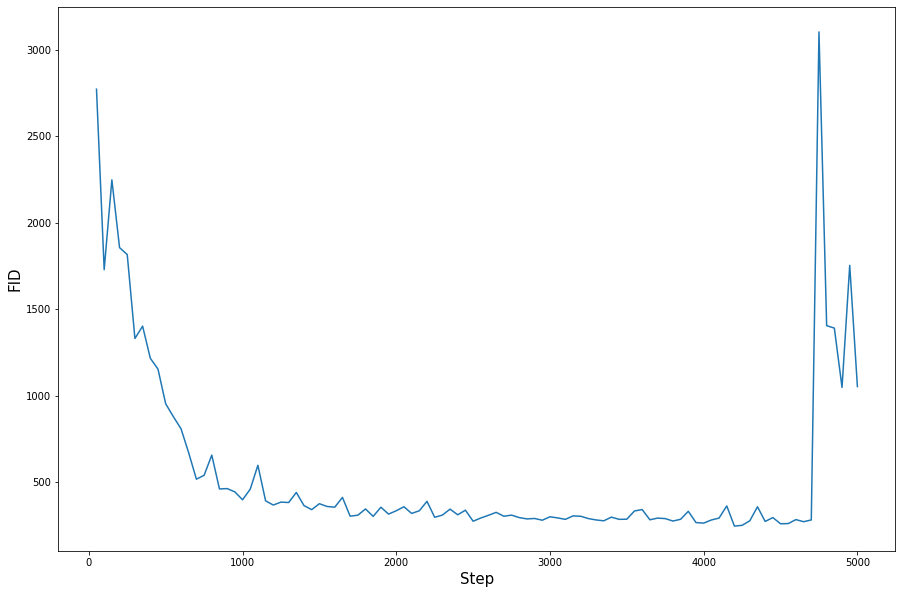

83


In [10]:
peak_data_patch = np.load(path_in)
SPLIT = 5
data_idx  = np.arange(len(scaled_F3_patch))
valid_idx  = data_idx[::SPLIT]
train_idx = np.delete(data_idx, valid_idx)
trainGT = np.expand_dims(scaled_F3_patch,3)[train_idx]
validGT = np.expand_dims(scaled_F3_patch,3)[valid_idx]
trainIN = np.expand_dims(peak_data_patch,3)[train_idx]
validIN = np.expand_dims(peak_data_patch,3)[valid_idx]

fids = []
for s in tqdm(step50s):
    model_path = '/h1/bhoon/20221229_pix2pix_lambda/model/lambda_1/G_{}.h5'.format(str(s).zfill(5))
    model = tf.keras.models.load_model(model_path)
    validOUT = model.predict(validIN)
    fid = FID_from_imgs(validGT,validOUT)
    fids.append(fid)
    show_grid_v2(validOUT, save='/h1/bhoon/20221229_pix2pix_lambda/image/lambda_1/{}.jpg'.format(str(s).zfill(5)), title=fid)
    del model
    
plt.figure(figsize=(15,10))
plt.plot(step50s,fids)
plt.xlabel("Step",fontsize=15)
plt.ylabel("FID",fontsize=15)
plt.show()
print(np.argmin(np.array(fids)))

f = open("/h1/bhoon/20221229_pix2pix_lambda/lambda_1_fid.txt", 'w')
for i in range(len(fids)):
    f.write("{}\n".format(str(fids[i])))
f.close()

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:09<14:51,  9.01s/it]

  2%|▏         | 2/100 [00:17<14:26,  8.84s/it]

  3%|▎         | 3/100 [00:26<14:28,  8.96s/it]

  4%|▍         | 4/100 [00:35<14:14,  8.90s/it]

  5%|▌         | 5/100 [00:44<14:10,  8.95s/it]

  6%|▌         | 6/100 [00:53<14:13,  9.08s/it]

  7%|▋         | 7/100 [01:02<13:58,  9.01s/it]

  8%|▊         | 8/100 [01:11<13:37,  8.89s/it]

  9%|▉         | 9/100 [01:20<13:38,  8.99s/it]

 10%|█         | 10/100 [01:29<13:29,  8.99s/it]

 11%|█         | 11/100 [01:38<13:22,  9.02s/it]

 12%|█▏        | 12/100 [01:46<12:54,  8.81s/it]

 13%|█▎        | 13/100 [01:55<12:47,  8.82s/it]

 14%|█▍        | 14/100 [02:04<12:36,  8.79s/it]

 15%|█▌        | 15/100 [02:12<12:17,  8.68s/it]

 16%|█▌        | 16/100 [02:22<12:25,  8.87s/it]

 17%|█▋        | 17/100 [02:30<12:10,  8.80s/it]

 18%|█▊        | 18/100 [02:39<11:48,  8.64s/it]

 19%|█▉        | 19/100 [02:47<11:27,  8.49s/it]

 20%|██        | 20/100 [02:55<11:16,  8.45s/it]

 21%|██        | 21/100 [03:03<11:03,  8.39s/it]

 22%|██▏       | 22/100 [03:13<11:12,  8.62s/it]

 23%|██▎       | 23/100 [03:21<10:55,  8.52s/it]

 24%|██▍       | 24/100 [03:30<10:53,  8.60s/it]

 25%|██▌       | 25/100 [03:38<10:33,  8.45s/it]

 26%|██▌       | 26/100 [03:46<10:24,  8.45s/it]

 27%|██▋       | 27/100 [03:55<10:14,  8.41s/it]

 28%|██▊       | 28/100 [04:03<10:06,  8.42s/it]

 29%|██▉       | 29/100 [04:11<09:54,  8.37s/it]

 30%|███       | 30/100 [04:20<09:52,  8.47s/it]

 31%|███       | 31/100 [04:28<09:37,  8.37s/it]

 32%|███▏      | 32/100 [04:36<09:30,  8.38s/it]

 33%|███▎      | 33/100 [04:46<09:43,  8.71s/it]

 34%|███▍      | 34/100 [04:55<09:43,  8.84s/it]

 35%|███▌      | 35/100 [05:04<09:44,  8.99s/it]

 36%|███▌      | 36/100 [05:13<09:22,  8.79s/it]

 37%|███▋      | 37/100 [05:21<09:08,  8.71s/it]

 38%|███▊      | 38/100 [05:30<09:01,  8.74s/it]

 39%|███▉      | 39/100 [05:38<08:44,  8.60s/it]

 40%|████      | 40/100 [05:47<08:34,  8.57s/it]

 41%|████      | 41/100 [05:55<08:26,  8.58s/it]

 42%|████▏     | 42/100 [06:04<08:16,  8.56s/it]

 43%|████▎     | 43/100 [06:13<08:10,  8.61s/it]

 44%|████▍     | 44/100 [06:21<07:55,  8.50s/it]

 45%|████▌     | 45/100 [06:29<07:46,  8.48s/it]

 46%|████▌     | 46/100 [06:39<07:53,  8.77s/it]

 47%|████▋     | 47/100 [06:47<07:42,  8.73s/it]

 48%|████▊     | 48/100 [06:56<07:36,  8.77s/it]

 49%|████▉     | 49/100 [07:05<07:29,  8.81s/it]

 50%|█████     | 50/100 [07:14<07:22,  8.85s/it]

 51%|█████     | 51/100 [07:23<07:17,  8.94s/it]

 52%|█████▏    | 52/100 [07:33<07:14,  9.06s/it]

 53%|█████▎    | 53/100 [07:42<07:07,  9.09s/it]

 54%|█████▍    | 54/100 [07:51<06:53,  8.98s/it]

 55%|█████▌    | 55/100 [07:59<06:32,  8.72s/it]

 56%|█████▌    | 56/100 [08:07<06:24,  8.74s/it]

 57%|█████▋    | 57/100 [08:16<06:13,  8.70s/it]

 58%|█████▊    | 58/100 [08:25<06:13,  8.89s/it]

 59%|█████▉    | 59/100 [08:35<06:10,  9.04s/it]

 60%|██████    | 60/100 [08:43<05:56,  8.91s/it]

 61%|██████    | 61/100 [08:52<05:46,  8.87s/it]

 62%|██████▏   | 62/100 [09:01<05:33,  8.78s/it]

 63%|██████▎   | 63/100 [09:09<05:22,  8.73s/it]

 64%|██████▍   | 64/100 [09:18<05:17,  8.82s/it]

 65%|██████▌   | 65/100 [09:28<05:17,  9.06s/it]

 66%|██████▌   | 66/100 [09:37<05:08,  9.08s/it]

 67%|██████▋   | 67/100 [09:46<04:52,  8.88s/it]

 68%|██████▊   | 68/100 [09:54<04:38,  8.72s/it]

 69%|██████▉   | 69/100 [10:02<04:27,  8.63s/it]

 70%|███████   | 70/100 [10:12<04:24,  8.81s/it]

 71%|███████   | 71/100 [10:20<04:10,  8.64s/it]

 72%|███████▏  | 72/100 [10:28<03:58,  8.54s/it]

 73%|███████▎  | 73/100 [10:36<03:48,  8.45s/it]

 74%|███████▍  | 74/100 [10:45<03:40,  8.47s/it]

 75%|███████▌  | 75/100 [10:54<03:40,  8.80s/it]

 76%|███████▌  | 76/100 [11:04<03:34,  8.94s/it]

 77%|███████▋  | 77/100 [11:12<03:23,  8.85s/it]

 78%|███████▊  | 78/100 [11:22<03:19,  9.07s/it]

 79%|███████▉  | 79/100 [11:32<03:14,  9.28s/it]

 80%|████████  | 80/100 [11:40<03:02,  9.12s/it]

 81%|████████  | 81/100 [11:49<02:48,  8.87s/it]

 82%|████████▏ | 82/100 [11:57<02:38,  8.81s/it]

 83%|████████▎ | 83/100 [12:05<02:25,  8.57s/it]

 84%|████████▍ | 84/100 [12:14<02:16,  8.53s/it]

 85%|████████▌ | 85/100 [12:22<02:08,  8.57s/it]

 86%|████████▌ | 86/100 [12:31<01:58,  8.47s/it]

 87%|████████▋ | 87/100 [12:39<01:50,  8.53s/it]

 88%|████████▊ | 88/100 [12:48<01:41,  8.50s/it]

 89%|████████▉ | 89/100 [12:56<01:32,  8.45s/it]

 90%|█████████ | 90/100 [13:05<01:25,  8.51s/it]

 91%|█████████ | 91/100 [13:13<01:16,  8.50s/it]

 92%|█████████▏| 92/100 [13:22<01:08,  8.55s/it]

 93%|█████████▎| 93/100 [13:30<00:59,  8.54s/it]

 94%|█████████▍| 94/100 [13:39<00:51,  8.65s/it]

 95%|█████████▌| 95/100 [13:49<00:44,  8.81s/it]

 96%|█████████▌| 96/100 [13:57<00:34,  8.66s/it]

 97%|█████████▋| 97/100 [14:05<00:25,  8.57s/it]

 98%|█████████▊| 98/100 [14:14<00:17,  8.59s/it]

 99%|█████████▉| 99/100 [14:22<00:08,  8.56s/it]

100%|██████████| 100/100 [14:31<00:00,  8.71s/it]


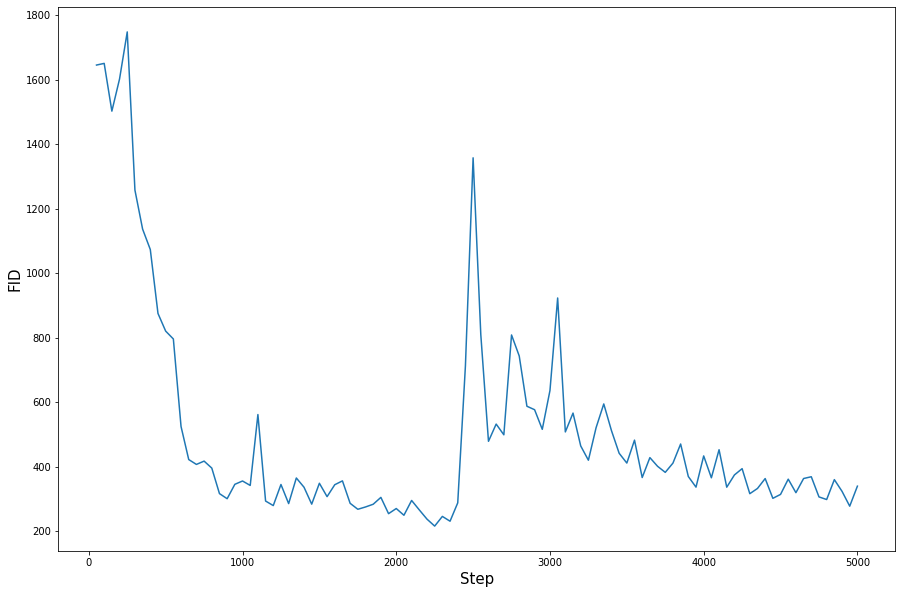

44


In [11]:
peak_data_patch = np.load(path_in)
SPLIT = 5
data_idx  = np.arange(len(scaled_F3_patch))
valid_idx  = data_idx[::SPLIT]
train_idx = np.delete(data_idx, valid_idx)
trainGT = np.expand_dims(scaled_F3_patch,3)[train_idx]
validGT = np.expand_dims(scaled_F3_patch,3)[valid_idx]
trainIN = np.expand_dims(peak_data_patch,3)[train_idx]
validIN = np.expand_dims(peak_data_patch,3)[valid_idx]

fids = []
for s in tqdm(step50s):
    model_path = '/h1/bhoon/20221229_pix2pix_lambda/model/lambda_10/G_{}.h5'.format(str(s).zfill(5))
    model = tf.keras.models.load_model(model_path)
    validOUT = model.predict(validIN)
    fid = FID_from_imgs(validGT,validOUT)
    fids.append(fid)
    show_grid_v2(validOUT, save='/h1/bhoon/20221229_pix2pix_lambda/image/lambda_10/{}.jpg'.format(str(s).zfill(5)), title=fid)
    del model
    
plt.figure(figsize=(15,10))
plt.plot(step50s,fids)
plt.xlabel("Step",fontsize=15)
plt.ylabel("FID",fontsize=15)
plt.show()
print(np.argmin(np.array(fids)))

f = open("/h1/bhoon/20221229_pix2pix_lambda/lambda_10_fid.txt", 'w')
for i in range(len(fids)):
    f.write("{}\n".format(str(fids[i])))
f.close()

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:08<14:09,  8.58s/it]

  2%|▏         | 2/100 [00:16<13:50,  8.47s/it]

  3%|▎         | 3/100 [00:25<13:38,  8.44s/it]

  4%|▍         | 4/100 [00:34<13:51,  8.66s/it]

  5%|▌         | 5/100 [00:42<13:36,  8.60s/it]

  6%|▌         | 6/100 [00:51<13:28,  8.60s/it]

  7%|▋         | 7/100 [00:59<13:18,  8.59s/it]

  8%|▊         | 8/100 [01:08<13:18,  8.68s/it]

  9%|▉         | 9/100 [01:17<13:02,  8.60s/it]

 10%|█         | 10/100 [01:25<12:56,  8.63s/it]

 11%|█         | 11/100 [01:34<12:45,  8.60s/it]

 12%|█▏        | 12/100 [01:43<12:35,  8.58s/it]

 13%|█▎        | 13/100 [01:51<12:23,  8.54s/it]

 14%|█▍        | 14/100 [02:00<12:15,  8.55s/it]

 15%|█▌        | 15/100 [02:09<12:23,  8.74s/it]

 16%|█▌        | 16/100 [02:17<12:14,  8.74s/it]

 17%|█▋        | 17/100 [02:26<12:07,  8.77s/it]

 18%|█▊        | 18/100 [02:35<11:53,  8.70s/it]

 19%|█▉        | 19/100 [02:43<11:42,  8.67s/it]

 20%|██        | 20/100 [02:52<11:32,  8.66s/it]

 21%|██        | 21/100 [03:02<11:48,  8.97s/it]

 22%|██▏       | 22/100 [03:11<11:47,  9.08s/it]

 23%|██▎       | 23/100 [03:20<11:24,  8.88s/it]

 24%|██▍       | 24/100 [03:28<11:03,  8.73s/it]

 25%|██▌       | 25/100 [03:36<10:41,  8.56s/it]

 26%|██▌       | 26/100 [03:46<10:53,  8.83s/it]

 27%|██▋       | 27/100 [03:55<10:53,  8.95s/it]

 28%|██▊       | 28/100 [04:04<10:55,  9.11s/it]

 29%|██▉       | 29/100 [04:14<10:52,  9.19s/it]

 30%|███       | 30/100 [04:23<10:36,  9.10s/it]

 31%|███       | 31/100 [04:31<10:08,  8.81s/it]

 32%|███▏      | 32/100 [04:39<09:57,  8.79s/it]

 33%|███▎      | 33/100 [04:48<09:35,  8.59s/it]

 34%|███▍      | 34/100 [04:56<09:23,  8.54s/it]

 35%|███▌      | 35/100 [05:04<09:05,  8.39s/it]

 36%|███▌      | 36/100 [05:13<09:01,  8.45s/it]

 37%|███▋      | 37/100 [05:21<08:47,  8.38s/it]

 38%|███▊      | 38/100 [05:29<08:36,  8.33s/it]

 39%|███▉      | 39/100 [05:38<08:34,  8.44s/it]

 40%|████      | 40/100 [05:46<08:28,  8.48s/it]

 41%|████      | 41/100 [05:55<08:22,  8.51s/it]

 42%|████▏     | 42/100 [06:03<08:12,  8.50s/it]

 43%|████▎     | 43/100 [06:12<08:03,  8.49s/it]

 44%|████▍     | 44/100 [06:20<07:55,  8.49s/it]

 45%|████▌     | 45/100 [06:29<07:43,  8.43s/it]

 46%|████▌     | 46/100 [06:37<07:33,  8.40s/it]

 47%|████▋     | 47/100 [06:45<07:26,  8.43s/it]

 48%|████▊     | 48/100 [06:54<07:17,  8.40s/it]

 49%|████▉     | 49/100 [07:02<07:09,  8.42s/it]

 50%|█████     | 50/100 [07:11<06:59,  8.38s/it]

 51%|█████     | 51/100 [07:20<07:05,  8.67s/it]

 52%|█████▏    | 52/100 [07:29<07:06,  8.88s/it]

 53%|█████▎    | 53/100 [07:38<06:49,  8.71s/it]

 54%|█████▍    | 54/100 [07:47<06:44,  8.79s/it]

 55%|█████▌    | 55/100 [07:55<06:32,  8.72s/it]

 56%|█████▌    | 56/100 [08:04<06:22,  8.70s/it]

 57%|█████▋    | 57/100 [08:12<06:11,  8.63s/it]

 58%|█████▊    | 58/100 [08:21<06:04,  8.68s/it]

 59%|█████▉    | 59/100 [08:30<06:01,  8.82s/it]

 60%|██████    | 60/100 [08:40<06:00,  9.00s/it]

 61%|██████    | 61/100 [08:48<05:44,  8.83s/it]

 62%|██████▏   | 62/100 [08:58<05:44,  9.08s/it]

 63%|██████▎   | 63/100 [09:06<05:30,  8.94s/it]

 64%|██████▍   | 64/100 [09:15<05:24,  9.02s/it]

 65%|██████▌   | 65/100 [09:24<05:12,  8.92s/it]

 66%|██████▌   | 66/100 [09:33<04:58,  8.79s/it]

 67%|██████▋   | 67/100 [09:41<04:49,  8.78s/it]

 68%|██████▊   | 68/100 [09:50<04:40,  8.77s/it]

 69%|██████▉   | 69/100 [09:59<04:33,  8.83s/it]

 70%|███████   | 70/100 [10:08<04:29,  8.99s/it]

 71%|███████   | 71/100 [10:19<04:35,  9.51s/it]

 72%|███████▏  | 72/100 [10:28<04:17,  9.20s/it]

 73%|███████▎  | 73/100 [10:36<04:05,  9.08s/it]

 74%|███████▍  | 74/100 [10:45<03:53,  8.98s/it]

 75%|███████▌  | 75/100 [10:54<03:42,  8.92s/it]

 76%|███████▌  | 76/100 [11:03<03:33,  8.88s/it]

 77%|███████▋  | 77/100 [11:12<03:26,  8.97s/it]

 78%|███████▊  | 78/100 [11:21<03:16,  8.94s/it]

 79%|███████▉  | 79/100 [11:29<03:02,  8.69s/it]

 80%|████████  | 80/100 [11:39<03:01,  9.08s/it]

 81%|████████  | 81/100 [11:48<02:51,  9.02s/it]

 82%|████████▏ | 82/100 [11:57<02:41,  8.95s/it]

 83%|████████▎ | 83/100 [12:05<02:30,  8.88s/it]

 84%|████████▍ | 84/100 [12:14<02:21,  8.83s/it]

 85%|████████▌ | 85/100 [12:22<02:10,  8.70s/it]

 86%|████████▌ | 86/100 [12:31<02:00,  8.64s/it]

 87%|████████▋ | 87/100 [12:39<01:51,  8.54s/it]

 88%|████████▊ | 88/100 [12:48<01:42,  8.54s/it]

 89%|████████▉ | 89/100 [12:56<01:33,  8.48s/it]

 90%|█████████ | 90/100 [13:04<01:24,  8.44s/it]

 91%|█████████ | 91/100 [13:13<01:17,  8.57s/it]

 92%|█████████▏| 92/100 [13:22<01:08,  8.53s/it]

 93%|█████████▎| 93/100 [13:30<00:59,  8.51s/it]

 94%|█████████▍| 94/100 [13:39<00:52,  8.69s/it]

 95%|█████████▌| 95/100 [13:49<00:44,  8.97s/it]

 96%|█████████▌| 96/100 [13:57<00:34,  8.74s/it]

 97%|█████████▋| 97/100 [14:07<00:27,  9.01s/it]

 98%|█████████▊| 98/100 [14:15<00:17,  8.73s/it]

 99%|█████████▉| 99/100 [14:23<00:08,  8.64s/it]

100%|██████████| 100/100 [14:32<00:00,  8.72s/it]


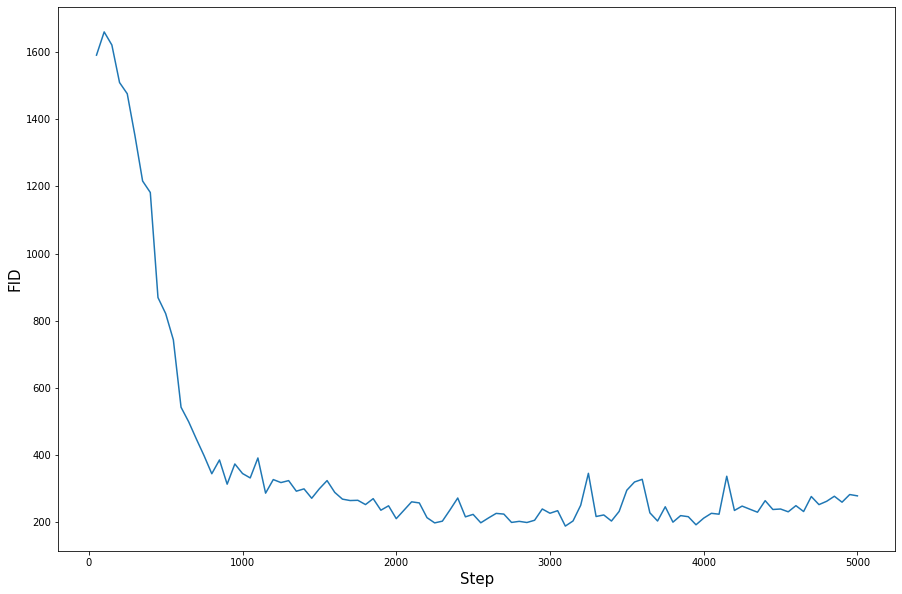

61


In [12]:
peak_data_patch = np.load(path_in)
SPLIT = 5
data_idx  = np.arange(len(scaled_F3_patch))
valid_idx  = data_idx[::SPLIT]
train_idx = np.delete(data_idx, valid_idx)
trainGT = np.expand_dims(scaled_F3_patch,3)[train_idx]
validGT = np.expand_dims(scaled_F3_patch,3)[valid_idx]
trainIN = np.expand_dims(peak_data_patch,3)[train_idx]
validIN = np.expand_dims(peak_data_patch,3)[valid_idx]

fids = []
for s in tqdm(step50s):
    model_path = '/h1/bhoon/20221229_pix2pix_lambda/model/lambda_100/G_{}.h5'.format(str(s).zfill(5))
    model = tf.keras.models.load_model(model_path)
    validOUT = model.predict(validIN)
    fid = FID_from_imgs(validGT,validOUT)
    fids.append(fid)
    show_grid_v2(validOUT, save='/h1/bhoon/20221229_pix2pix_lambda/image/lambda_100/{}.jpg'.format(str(s).zfill(5)), title=fid)
    del model
    
plt.figure(figsize=(15,10))
plt.plot(step50s,fids)
plt.xlabel("Step",fontsize=15)
plt.ylabel("FID",fontsize=15)
plt.show()
print(np.argmin(np.array(fids)))

f = open("/h1/bhoon/20221229_pix2pix_lambda/lambda_100_fid.txt", 'w')
for i in range(len(fids)):
    f.write("{}\n".format(str(fids[i])))
f.close()

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:09<15:20,  9.30s/it]

  2%|▏         | 2/100 [00:17<14:38,  8.97s/it]

  3%|▎         | 3/100 [00:26<14:33,  9.00s/it]

  4%|▍         | 4/100 [00:36<14:39,  9.16s/it]

  5%|▌         | 5/100 [00:44<14:13,  8.99s/it]

  6%|▌         | 6/100 [00:53<14:01,  8.95s/it]

  7%|▋         | 7/100 [01:02<14:02,  9.06s/it]

  8%|▊         | 8/100 [01:12<13:56,  9.09s/it]

  9%|▉         | 9/100 [01:21<13:52,  9.15s/it]

 10%|█         | 10/100 [01:31<14:02,  9.36s/it]

 11%|█         | 11/100 [01:40<14:01,  9.45s/it]

 12%|█▏        | 12/100 [01:50<13:51,  9.44s/it]

 13%|█▎        | 13/100 [01:59<13:35,  9.37s/it]

 14%|█▍        | 14/100 [02:08<13:10,  9.19s/it]

 15%|█▌        | 15/100 [02:17<13:10,  9.30s/it]

 16%|█▌        | 16/100 [02:27<13:08,  9.39s/it]

 17%|█▋        | 17/100 [02:37<13:04,  9.45s/it]

 18%|█▊        | 18/100 [02:45<12:28,  9.13s/it]

 19%|█▉        | 19/100 [02:53<12:05,  8.96s/it]

 20%|██        | 20/100 [03:03<12:13,  9.17s/it]

 21%|██        | 21/100 [03:12<11:55,  9.06s/it]

 22%|██▏       | 22/100 [03:21<11:37,  8.94s/it]

 23%|██▎       | 23/100 [03:29<11:27,  8.93s/it]

 24%|██▍       | 24/100 [03:39<11:27,  9.05s/it]

 25%|██▌       | 25/100 [03:48<11:27,  9.16s/it]

 26%|██▌       | 26/100 [03:57<11:17,  9.15s/it]

 27%|██▋       | 27/100 [04:06<10:59,  9.04s/it]

 28%|██▊       | 28/100 [04:15<10:41,  8.91s/it]

 29%|██▉       | 29/100 [04:24<10:31,  8.90s/it]

 30%|███       | 30/100 [04:32<10:20,  8.86s/it]

 31%|███       | 31/100 [04:42<10:24,  9.05s/it]

 32%|███▏      | 32/100 [04:51<10:14,  9.04s/it]

 33%|███▎      | 33/100 [05:00<10:09,  9.09s/it]

 34%|███▍      | 34/100 [05:09<09:48,  8.92s/it]

 35%|███▌      | 35/100 [05:18<09:46,  9.03s/it]

 36%|███▌      | 36/100 [05:27<09:43,  9.12s/it]

 37%|███▋      | 37/100 [05:36<09:35,  9.14s/it]

 38%|███▊      | 38/100 [05:45<09:19,  9.03s/it]

 39%|███▉      | 39/100 [05:54<09:01,  8.87s/it]

 40%|████      | 40/100 [06:03<08:51,  8.86s/it]

 41%|████      | 41/100 [06:12<08:45,  8.92s/it]

 42%|████▏     | 42/100 [06:21<08:41,  8.99s/it]

 43%|████▎     | 43/100 [06:30<08:34,  9.02s/it]

 44%|████▍     | 44/100 [06:39<08:35,  9.21s/it]

 45%|████▌     | 45/100 [06:49<08:28,  9.24s/it]

 46%|████▌     | 46/100 [06:58<08:16,  9.20s/it]

 47%|████▋     | 47/100 [07:07<08:10,  9.26s/it]

 48%|████▊     | 48/100 [07:16<07:53,  9.11s/it]

 49%|████▉     | 49/100 [07:25<07:38,  8.99s/it]

 50%|█████     | 50/100 [07:33<07:17,  8.76s/it]

 51%|█████     | 51/100 [07:42<07:08,  8.74s/it]

 52%|█████▏    | 52/100 [07:50<06:53,  8.62s/it]

 53%|█████▎    | 53/100 [07:59<06:43,  8.58s/it]

 54%|█████▍    | 54/100 [08:07<06:32,  8.53s/it]

 55%|█████▌    | 55/100 [08:16<06:29,  8.66s/it]

 56%|█████▌    | 56/100 [08:25<06:22,  8.68s/it]

 57%|█████▋    | 57/100 [08:33<06:10,  8.61s/it]

 58%|█████▊    | 58/100 [08:42<05:59,  8.56s/it]

 59%|█████▉    | 59/100 [08:50<05:49,  8.52s/it]

 60%|██████    | 60/100 [08:59<05:52,  8.80s/it]

 61%|██████    | 61/100 [09:08<05:39,  8.71s/it]

 62%|██████▏   | 62/100 [09:17<05:37,  8.89s/it]

 63%|██████▎   | 63/100 [09:26<05:26,  8.81s/it]

 64%|██████▍   | 64/100 [09:35<05:18,  8.86s/it]

 65%|██████▌   | 65/100 [09:44<05:14,  8.97s/it]

 66%|██████▌   | 66/100 [09:53<05:07,  9.04s/it]

 67%|██████▋   | 67/100 [10:03<05:06,  9.28s/it]

 68%|██████▊   | 68/100 [10:12<04:52,  9.15s/it]

 69%|██████▉   | 69/100 [10:21<04:45,  9.22s/it]

 70%|███████   | 70/100 [10:31<04:38,  9.28s/it]

 71%|███████   | 71/100 [10:40<04:31,  9.35s/it]

 72%|███████▏  | 72/100 [10:49<04:16,  9.15s/it]

 73%|███████▎  | 73/100 [11:00<04:19,  9.61s/it]

 74%|███████▍  | 74/100 [11:08<04:03,  9.35s/it]

 75%|███████▌  | 75/100 [11:17<03:47,  9.11s/it]

 76%|███████▌  | 76/100 [11:25<03:32,  8.87s/it]

 77%|███████▋  | 77/100 [11:34<03:22,  8.80s/it]

 78%|███████▊  | 78/100 [11:42<03:10,  8.67s/it]

 79%|███████▉  | 79/100 [11:51<03:01,  8.64s/it]

 80%|████████  | 80/100 [11:59<02:51,  8.55s/it]

 81%|████████  | 81/100 [12:07<02:40,  8.46s/it]

 82%|████████▏ | 82/100 [12:16<02:34,  8.56s/it]

 83%|████████▎ | 83/100 [12:25<02:25,  8.54s/it]

 84%|████████▍ | 84/100 [12:33<02:16,  8.54s/it]

 85%|████████▌ | 85/100 [12:41<02:06,  8.41s/it]

 86%|████████▌ | 86/100 [12:50<01:57,  8.39s/it]

 87%|████████▋ | 87/100 [12:58<01:48,  8.38s/it]

 88%|████████▊ | 88/100 [13:07<01:43,  8.62s/it]

 89%|████████▉ | 89/100 [13:15<01:33,  8.51s/it]

 90%|█████████ | 90/100 [13:24<01:25,  8.53s/it]

 91%|█████████ | 91/100 [13:33<01:19,  8.78s/it]

 92%|█████████▏| 92/100 [13:42<01:10,  8.83s/it]

 93%|█████████▎| 93/100 [13:51<01:01,  8.80s/it]

 94%|█████████▍| 94/100 [14:00<00:53,  8.95s/it]

 95%|█████████▌| 95/100 [14:09<00:44,  8.90s/it]

 96%|█████████▌| 96/100 [14:18<00:35,  8.83s/it]

 97%|█████████▋| 97/100 [14:27<00:26,  8.85s/it]

 98%|█████████▊| 98/100 [14:35<00:17,  8.80s/it]

 99%|█████████▉| 99/100 [14:45<00:08,  8.99s/it]

100%|██████████| 100/100 [14:54<00:00,  8.95s/it]


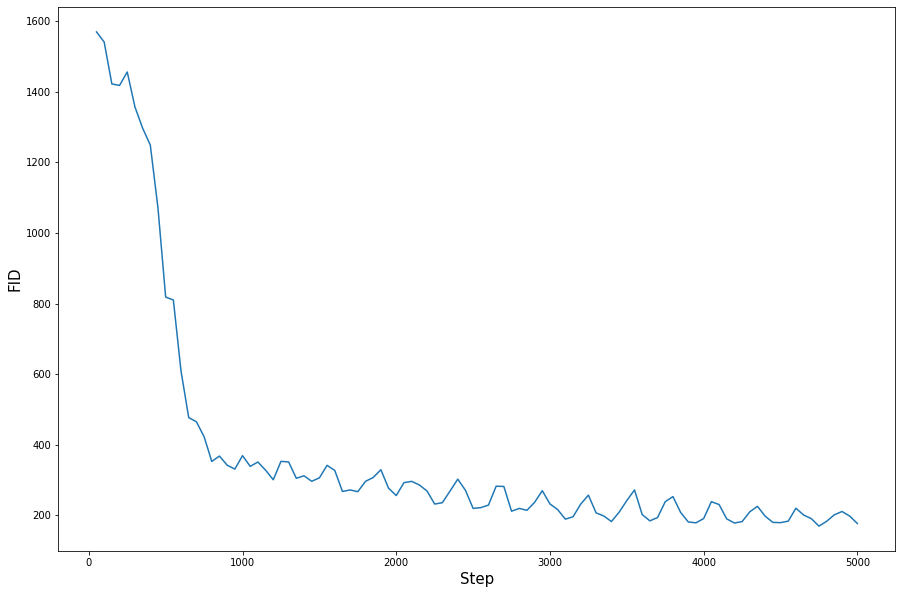

94


In [13]:
peak_data_patch = np.load(path_in)
SPLIT = 5
data_idx  = np.arange(len(scaled_F3_patch))
valid_idx  = data_idx[::SPLIT]
train_idx = np.delete(data_idx, valid_idx)
trainGT = np.expand_dims(scaled_F3_patch,3)[train_idx]
validGT = np.expand_dims(scaled_F3_patch,3)[valid_idx]
trainIN = np.expand_dims(peak_data_patch,3)[train_idx]
validIN = np.expand_dims(peak_data_patch,3)[valid_idx]

fids = []
for s in tqdm(step50s):
    model_path = '/h1/bhoon/20221229_pix2pix_lambda/model/lambda_1000/G_{}.h5'.format(str(s).zfill(5))
    model = tf.keras.models.load_model(model_path)
    validOUT = model.predict(validIN)
    fid = FID_from_imgs(validGT,validOUT)
    fids.append(fid)
    show_grid_v2(validOUT, save='/h1/bhoon/20221229_pix2pix_lambda/image/lambda_1000/{}.jpg'.format(str(s).zfill(5)), title=fid)
    del model
    
plt.figure(figsize=(15,10))
plt.plot(step50s,fids)
plt.xlabel("Step",fontsize=15)
plt.ylabel("FID",fontsize=15)
plt.show()
print(np.argmin(np.array(fids)))

f = open("/h1/bhoon/20221229_pix2pix_lambda/lambda_1000_fid.txt", 'w')
for i in range(len(fids)):
    f.write("{}\n".format(str(fids[i])))
f.close()

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:12<20:53, 12.66s/it]

  2%|▏         | 2/100 [00:22<19:03, 11.67s/it]

  3%|▎         | 3/100 [00:30<17:05, 10.57s/it]

  4%|▍         | 4/100 [00:38<15:53,  9.93s/it]

  5%|▌         | 5/100 [00:45<14:34,  9.21s/it]

  6%|▌         | 6/100 [00:54<13:59,  8.93s/it]

  7%|▋         | 7/100 [01:02<13:26,  8.67s/it]

  8%|▊         | 8/100 [01:10<13:00,  8.48s/it]

  9%|▉         | 9/100 [01:18<12:37,  8.33s/it]

 10%|█         | 10/100 [01:26<12:29,  8.33s/it]

 11%|█         | 11/100 [01:34<11:54,  8.03s/it]

 12%|█▏        | 12/100 [01:41<11:26,  7.80s/it]

 13%|█▎        | 13/100 [01:48<10:56,  7.54s/it]

 14%|█▍        | 14/100 [01:55<10:41,  7.46s/it]

 15%|█▌        | 15/100 [02:02<10:23,  7.34s/it]

 16%|█▌        | 16/100 [02:09<10:16,  7.33s/it]

 17%|█▋        | 17/100 [02:17<10:11,  7.36s/it]

 18%|█▊        | 18/100 [02:24<09:56,  7.27s/it]

 19%|█▉        | 19/100 [02:31<09:50,  7.29s/it]

 20%|██        | 20/100 [02:38<09:40,  7.25s/it]

 21%|██        | 21/100 [02:46<09:37,  7.31s/it]

 22%|██▏       | 22/100 [02:53<09:25,  7.25s/it]

 23%|██▎       | 23/100 [03:00<09:21,  7.30s/it]

 24%|██▍       | 24/100 [03:07<09:10,  7.25s/it]

 25%|██▌       | 25/100 [03:15<09:08,  7.31s/it]

 26%|██▌       | 26/100 [03:22<08:55,  7.23s/it]

 27%|██▋       | 27/100 [03:29<08:46,  7.21s/it]

 28%|██▊       | 28/100 [03:36<08:32,  7.11s/it]

 29%|██▉       | 29/100 [03:43<08:30,  7.19s/it]

 30%|███       | 30/100 [03:51<08:42,  7.47s/it]

 31%|███       | 31/100 [03:59<08:32,  7.43s/it]

 32%|███▏      | 32/100 [04:06<08:26,  7.45s/it]

 33%|███▎      | 33/100 [04:15<08:36,  7.71s/it]

 34%|███▍      | 34/100 [04:23<08:40,  7.88s/it]

 35%|███▌      | 35/100 [04:31<08:35,  7.93s/it]

 36%|███▌      | 36/100 [04:39<08:22,  7.85s/it]

 37%|███▋      | 37/100 [04:46<08:04,  7.70s/it]

 38%|███▊      | 38/100 [04:54<07:58,  7.72s/it]

 39%|███▉      | 39/100 [05:01<07:47,  7.66s/it]

 40%|████      | 40/100 [05:10<07:56,  7.94s/it]

 41%|████      | 41/100 [05:17<07:38,  7.77s/it]

 42%|████▏     | 42/100 [05:25<07:23,  7.65s/it]

 43%|████▎     | 43/100 [05:32<07:11,  7.57s/it]

 44%|████▍     | 44/100 [05:39<06:58,  7.47s/it]

 45%|████▌     | 45/100 [05:47<06:48,  7.42s/it]

 46%|████▌     | 46/100 [05:54<06:38,  7.37s/it]

 47%|████▋     | 47/100 [06:02<06:46,  7.67s/it]

 48%|████▊     | 48/100 [06:09<06:33,  7.57s/it]

 49%|████▉     | 49/100 [06:18<06:37,  7.79s/it]

 50%|█████     | 50/100 [06:26<06:31,  7.83s/it]

 51%|█████     | 51/100 [06:33<06:19,  7.74s/it]

 52%|█████▏    | 52/100 [06:41<06:04,  7.60s/it]

 53%|█████▎    | 53/100 [06:49<06:09,  7.87s/it]

 54%|█████▍    | 54/100 [06:56<05:51,  7.64s/it]

 55%|█████▌    | 55/100 [07:03<05:33,  7.41s/it]

 56%|█████▌    | 56/100 [07:10<05:24,  7.39s/it]

 57%|█████▋    | 57/100 [07:17<05:13,  7.30s/it]

 58%|█████▊    | 58/100 [07:25<05:04,  7.26s/it]

 59%|█████▉    | 59/100 [07:32<04:56,  7.23s/it]

 60%|██████    | 60/100 [07:39<04:46,  7.17s/it]

 61%|██████    | 61/100 [07:46<04:35,  7.08s/it]

 62%|██████▏   | 62/100 [07:53<04:29,  7.09s/it]

 63%|██████▎   | 63/100 [08:00<04:21,  7.07s/it]

 64%|██████▍   | 64/100 [08:07<04:14,  7.07s/it]

 65%|██████▌   | 65/100 [08:14<04:06,  7.05s/it]

 66%|██████▌   | 66/100 [08:21<04:00,  7.08s/it]

 67%|██████▋   | 67/100 [08:28<03:52,  7.03s/it]

 68%|██████▊   | 68/100 [08:36<03:53,  7.28s/it]

 69%|██████▉   | 69/100 [08:44<03:53,  7.53s/it]

 70%|███████   | 70/100 [08:52<03:48,  7.60s/it]

 71%|███████   | 71/100 [08:59<03:36,  7.48s/it]

 72%|███████▏  | 72/100 [09:06<03:25,  7.34s/it]

 73%|███████▎  | 73/100 [09:14<03:25,  7.60s/it]

 74%|███████▍  | 74/100 [09:22<03:20,  7.70s/it]

 75%|███████▌  | 75/100 [09:29<03:10,  7.63s/it]

 76%|███████▌  | 76/100 [09:37<03:00,  7.54s/it]

 77%|███████▋  | 77/100 [09:44<02:52,  7.50s/it]

 78%|███████▊  | 78/100 [09:52<02:47,  7.62s/it]

 79%|███████▉  | 79/100 [10:00<02:39,  7.58s/it]

 80%|████████  | 80/100 [10:07<02:33,  7.66s/it]

 81%|████████  | 81/100 [10:15<02:25,  7.64s/it]

 82%|████████▏ | 82/100 [10:22<02:14,  7.49s/it]

 83%|████████▎ | 83/100 [10:29<02:04,  7.35s/it]

 84%|████████▍ | 84/100 [10:37<01:57,  7.36s/it]

 85%|████████▌ | 85/100 [10:45<01:53,  7.54s/it]

 86%|████████▌ | 86/100 [10:53<01:48,  7.75s/it]

 87%|████████▋ | 87/100 [11:00<01:39,  7.64s/it]

 88%|████████▊ | 88/100 [11:08<01:31,  7.60s/it]

 89%|████████▉ | 89/100 [11:16<01:24,  7.69s/it]

 90%|█████████ | 90/100 [11:24<01:18,  7.81s/it]

 91%|█████████ | 91/100 [11:31<01:09,  7.68s/it]

 92%|█████████▏| 92/100 [11:38<01:00,  7.55s/it]

 93%|█████████▎| 93/100 [11:45<00:51,  7.41s/it]

 94%|█████████▍| 94/100 [11:52<00:43,  7.25s/it]

 95%|█████████▌| 95/100 [11:59<00:35,  7.15s/it]

 96%|█████████▌| 96/100 [12:06<00:28,  7.07s/it]

 97%|█████████▋| 97/100 [12:13<00:20,  6.98s/it]

 98%|█████████▊| 98/100 [12:20<00:13,  7.00s/it]

 99%|█████████▉| 99/100 [12:27<00:07,  7.06s/it]

100%|██████████| 100/100 [12:34<00:00,  7.55s/it]


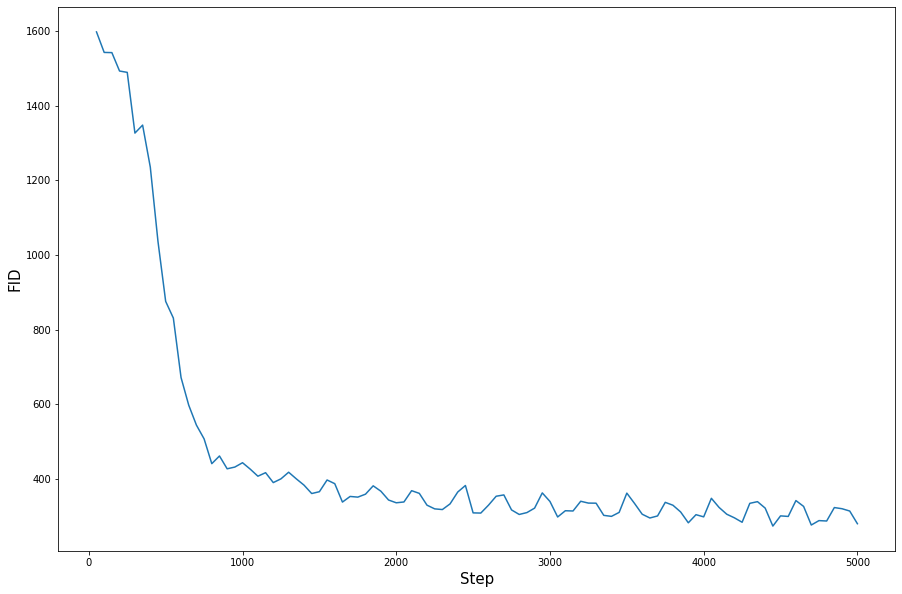

88


In [8]:
peak_data_patch = np.load(path_in)
SPLIT = 5
data_idx  = np.arange(len(scaled_F3_patch))
valid_idx  = data_idx[::SPLIT]
train_idx = np.delete(data_idx, valid_idx)
trainGT = np.expand_dims(scaled_F3_patch,3)[train_idx]
validGT = np.expand_dims(scaled_F3_patch,3)[valid_idx]
trainIN = np.expand_dims(peak_data_patch,3)[train_idx]
validIN = np.expand_dims(peak_data_patch,3)[valid_idx]

fids = []
for s in tqdm(step50s):
    model_path = '/h1/bhoon/20221229_pix2pix_lambda/model/l1/G_{}.h5'.format(str(s).zfill(5))
    model = tf.keras.models.load_model(model_path)
    validOUT = model.predict(validIN)
    fid = FID_from_imgs(validGT,validOUT)
    fids.append(fid)
    show_grid_v2(validOUT, save='/h1/bhoon/20221229_pix2pix_lambda/image/l1/{}.jpg'.format(str(s).zfill(5)), title=fid)
    del model
    
plt.figure(figsize=(15,10))
plt.plot(step50s,fids)
plt.xlabel("Step",fontsize=15)
plt.ylabel("FID",fontsize=15)
plt.show()
print(np.argmin(np.array(fids)))

f = open("/h1/bhoon/20221229_pix2pix_lambda/l1_fid.txt", 'w')
for i in range(len(fids)):
    f.write("{}\n".format(str(fids[i])))
f.close()